In [78]:
from numpy import pi
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit_textbook.tools import array_to_latex

In [79]:
def add_qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(pi/2**(n-qubit), qubit, n)
    add_qft_rotations(qc, n)

def add_qft_swaps(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    return qc

def make_qft(n, swaps):
    qc = QuantumCircuit(n)
    add_qft_rotations(qc, n)
    if swaps:
        add_qft_swaps(qc, n)
    return qc

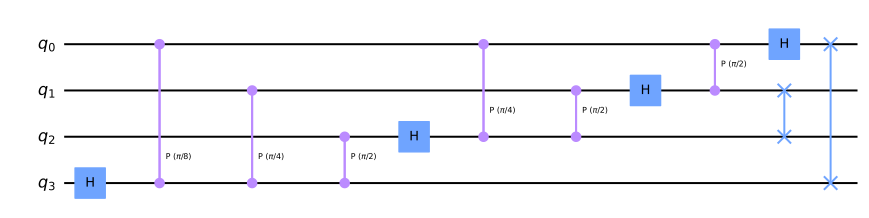

In [80]:
qc = make_qft(n=4, swaps=True)
qc.draw()

In [81]:
def apply_qft(n, value, swaps):
    bin_value = bin(value)[2:].zfill(n)
    qc = QuantumCircuit(n)
    qc.initialize(bin_value, qc.qubits)
    qft = make_qft(n, swaps)
    qc = qc.compose(qft)
    display(qc.draw())
    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))
    array_to_latex(statevector, pretext="\\text{Statevector} = ")
    return statevector


In [82]:
statevector = apply_qft(n=2, value=0, swaps=False)
print(statevector.data)

TypeError: apply_qft() missing 1 required positional argument: 'swaps'

Show density matrices:

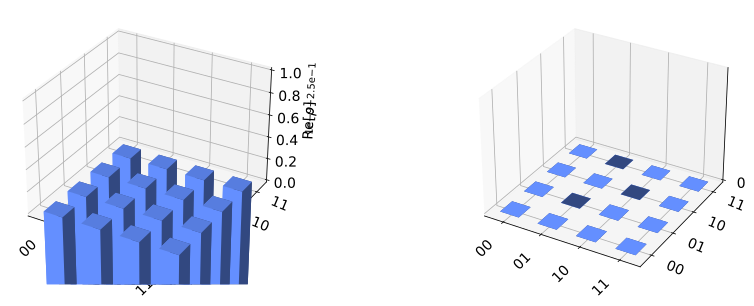

Density matrix =  [[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
 [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
 [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
 [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]]


In [ ]:
display(plot_state_city(statevector))
density_matrix = DensityMatrix(statevector)
print("Density matrix = ", density_matrix.data)